In [0]:
#Description: This program detects breast cncer, based off of data

In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#load the data
# from google.colab import files
# uploaded = files.upload()
df = pd.read_csv('data.csv')
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [6]:
df.shape


(569, 33)

In [7]:
#Drop the column with all missing values
df=df.dropna(axis=1)

In [8]:
df.shape

(569, 32)

In [9]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

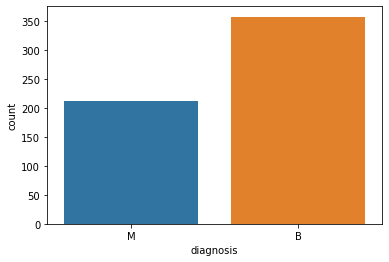

In [10]:
#Visualize the count
sns.countplot(df['diagnosis'], label='count')

In [11]:
#Check the data type
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [12]:
#Encode the data categories data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

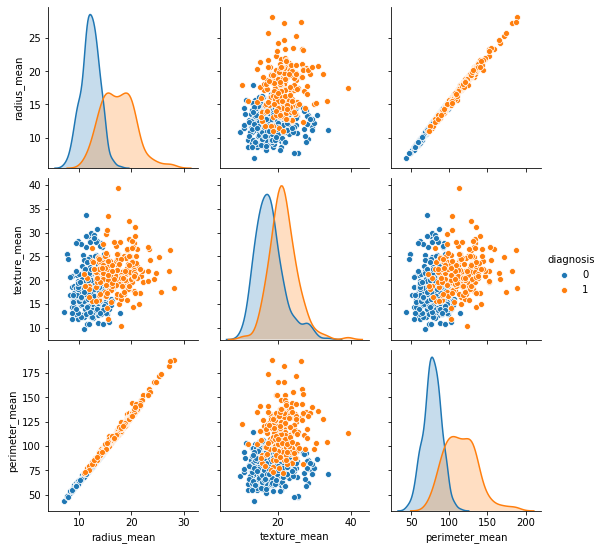

In [13]:
#Create a pair plot
sns.pairplot(df.iloc[:,1:5], hue='diagnosis')

In [14]:
#Get the correelation of the columns
df.iloc[:,1:12].corr()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


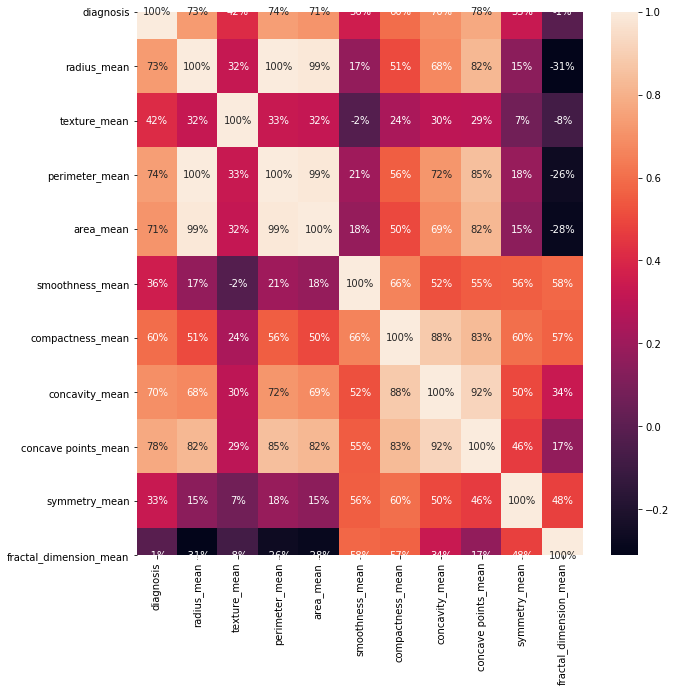

In [15]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True , fmt='.0%')

In [16]:
 X = df.iloc[:,2:31].values
 Y = df.iloc[:,1].values

In [17]:
#Split the data set in to 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25, random_state = 0)


In [18]:
#Scale the data (Feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [19]:
#Create a function for the models
def models(X_train,Y_train):
  
  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train,Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree= DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train,Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest  = RandomForestClassifier(n_estimators= 10, criterion = 'entropy', random_state=0)
  forest.fit(X_train,Y_train)

  #Print the modles accuracy on the training data
  print('[0]Logistic Regression Training Accuracy:' , log.score(X_train,Y_train))
  print('[1]Decision Tree Training Accuracy:' , tree.score(X_train,Y_train))
  print('[2]Random Forest Training Accuracy:' , forest.score(X_train,Y_train))

  return log,tree, forest

In [20]:
#Getting all of the models
models = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.9906103286384976
[1]Decision Tree Training Accuracy: 1.0
[2]Random Forest Training Accuracy: 0.9953051643192489


In [21]:
#Test models accuracy on test data on confution matrix
from sklearn.metrics import confusion_matrix

for i in range( len(models) ):
  print('Model',i)
  cm  =confusion_matrix(Y_test,models[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print('Testing Accuracy =', (TP+TN)/(TP+TN+FN+FP))

Model 0
[[86  4]
 [ 3 50]]
Testing Accuracy = 0.951048951048951
Model 1
[[83  7]
 [ 2 51]]
Testing Accuracy = 0.9370629370629371
Model 2
[[87  3]
 [ 2 51]]
Testing Accuracy = 0.965034965034965


In [22]:
#Show another way to get matrics of the modles
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range( len(models) ):
  print('Model',i)
  print( classification_report(Y_test,models[i].predict(X_test)))
  print (accuracy_score(Y_test,models[i].predict(X_test)))
  print()

Model 0
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Model 1
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.88      0.96      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

0.9370629370629371

Model 2
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted av

In [23]:
#Print the prediction of Random Forest Classifier MOdel
pred = models[2].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


In [24]:
a=X_test[1]
p=models[2].predict([a])
print (X_test[1])
print (p)

[-0.23927557  1.20953909 -0.30776593 -0.32756529 -0.57492927 -0.92580153
 -0.73956439 -0.71148962 -0.80536136 -0.9836759  -0.80543757  0.21044227
 -0.85774844 -0.62021463 -0.41371289 -0.91150812 -0.66647515 -0.81890411
 -0.87464651 -0.82601506 -0.38282965  1.32199868 -0.47336605 -0.44009447
 -0.13610472 -0.88286449 -0.59768168 -0.79588429 -0.81775175]
[0]


In [25]:
import pickle

In [26]:
pickle.dump(models[2], open('model.pkl','wb'))